<h2><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTPskj1g-Ri8Bb5tiVKNaJtGjM4nKFZ84SaHM78R2amyGwL3Ok" alt="roundtoc" style="float:left;width:40px;height:40px;">   <b>Configuration Block</b><a class="anchor" id="H0"></a></h2>  

&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  

In [ ]:
generate_highlighted_heading('3. Cleaning Text')

In [1]:
# ---------------------------------------------------------------------------------------------------------- #
#                                     <<<<[[[[  CONFIGURATION  ]]]]>>>>                                      #
# ---------------------------------------------------------------------------------------------------------- #

config = {
    'Paths': {
        'RAW_training_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/training.1600000.processed.noemoticon.csv',
        'RAW_test_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/testdata.manual.2009.06.14.csv',
        'cleaned_train_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/cleaned_train_data.tsv',
        'cleaned_test_data_file': '/home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/data/inputs/cleaned_test_data.tsv',
    },
    'DataPreparation': {
        'All_Features': '''['sentiment_class','id','date','query_string','user','text']''', ## will be used to define/give names to the columns
        'FeatureToDrop': '''['id','date','query_string','user']''',
        'frac_in_sample_to_take': '0.025',
        'text_cleaning_steps' : '''['accented_char_removal', 'remove_attherate_mentions', 'remove_urls', 'html_stripping', 'contraction_expansion', 'text_lemmatization', 'special_char_removal', 'remove_digits', 'remove_whitespace_character', 'remove_extra_whitespaces', 'remove_commas_bw_digits', 'remove_extra_meaningless_newlines', 'text_lower_case']''',
        'temp': 'temp'
    }
    
    
    
#     'training_file_cleaned': 'CleanedTrainingData.csv',
#     'test_file_cleaned': 'CleanedTestData.csv',
#     'term_frequency_file': "TermFrequency.csv",
#     'Train:Val:TestSplit': '98:1:1'

#     'DimensionalityTransformationAlgo':['PCA', 'ICA'],

#     'bq_env': {'edit_query': 'Yes', 
#                'bq_query_template_file': 'QueryTemplateClustering.txt', 
#                'sid': ['1071'] ,
#                'date': ['010218'],
#                'MaxNoObsToGet': '1000000'},

#     'Trial':["ABC","DEF","GHI"],
}

# ---------------------------------------------------------------------------------------------------------- #

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;1. Importing the Libraries</b><a class="anchor" id="H1"></a></h2>

&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [2]:
from txt0_GeneralFunc import (levprint, print_system_info, generate_highlighted_heading, 
                              get_abs_path_from_relative_path, time_cataloging, 
                              create_key, add_recommendation)
print_system_info()

+----------------------------------------------------------------------------------------------------------------
| Inside "print_system_info" function.
| Python Version: 3.6.7
| Machine Name: localmachine
| OS: Linux-4.15.0-50-generic-x86_64-with-Ubuntu-18.04-bionic
| Hardware: 	 CPU brand: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz
| 		 CPU # of cores: 4
| 		 RAM: Total = 7.68 GB, Available = 2.18 GB
| Current Working Directory: /home/ubuntu/Documents/JobWorkSpace/TwitterSentimentAnalysis-RickyTim/TwitterSentimentalAnalysis/bin
+----------------------------------------------------------------------------------------------------------------


In [3]:
'''
Description: 
    This file provide some function that are for general use cases.
Function this file Contains:
    - levprint: It is used to print statement based on the level. i.e.  function level.
    - print_system_info: Used to print the system configurations
    - generate_highlighted_heading: Used to generate some comment based heading / seperators
Package Installation:
# !pip3 install seaborn
Reference Links:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
'''

# --------------------------------------------  Loading Libraries  --------------------------------------------- #
import time, os, glob, ast, re
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

# pd.set_option('display.height', 10000)
pd.set_option('display.max_colwidth', 180)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
plt.style.use('fivethirtyeight')
%matplotlib inline 
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# start_time = time.time()
# print('Time taken {:.4f} s'.format(end_time - start_time))

# ---------------------------------------------------------------------------------------------------------- #

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;2. Importing the Data</b><a class="anchor" id="H2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [4]:
# from subprocess import check_output
# print("CSV Files present in the directory:", check_output(["ls", "*.csv"]).decode("utf8")) #../input
# print("CSV Files present in the directory:\n", '\n'.join(glob.glob(config['input_dir'] + '*.{}'.format('csv')))) #../input

In [5]:
def get_dataset(config):
    '''
    '''
    
    cols = ast.literal_eval(str(config['DataPreparation']['All_Features']))
    sample_frac = float(config['DataPreparation']['frac_in_sample_to_take'])
    tr_path, tst_path = config['Paths']['RAW_training_data_file'], config['Paths']['RAW_test_data_file']
    
    # ------------------------------<<<  1. Loading the Dataset  >>>------------------------------ #
    train_DF = pd.read_csv(tr_path, encoding="ISO-8859-1", header=None, names=cols)
    test_DF = pd.read_csv(tst_path, encoding="ISO-8859-1", header=None, names=cols)
    print('Original Train Dataset Shape :', train_DF.shape)
    print('Original Test Dataset Shape :', test_DF.shape)
    # display(train_DF.head())
    
    # --------------------------<<<  2. Sampling From the Dataset  >>>---------------------------- #
    print('\nWorking with a smaller sample for scalability')
    if sample_frac > 1:
        sample_frac, sample_n = None, int(sample_frac)
    else:
        sample_frac, sample_n = sample_frac, None
    train_DF = train_DF.sample(n=sample_n, frac=sample_frac).reset_index(drop=True)
    print('\nChecking observations in Class')
    print(train_DF['sentiment_class'].value_counts())
    # display(train_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))
    print('\nShape of Sampled Training data: {}'.format(train_DF.shape))
    
    return train_DF, test_DF
    # -------------------------------------------------------------------------------------------- #

train_DF, test_DF = get_dataset(config)

Original Train Dataset Shape : (1600000, 6)
Original Test Dataset Shape : (498, 6)

Working with a smaller sample for scalability

Checking observations in Class
4    20101
0    19899
Name: sentiment_class, dtype: int64

Shape of Sampled Training data: (40000, 6)


<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;3. Understanding the Data</b><a class="anchor" id="H3"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

In [6]:
from lib import datasetPrimAnalysis

print("Observing the structure of Train dataset")
# print("Train Dataset Shape :", train_DF.shape)
_ = datasetPrimAnalysis(train_DF)

print("Observing the structure of Test dataset")
_ = datasetPrimAnalysis(test_DF)

Observing the structure of Train dataset
Overall dataset shape : (40000, 6)
____________| Number of feature/s which are Qualitative : 4 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
date,0,object,0,40000,38921,Fri May 29 12:51:39 PDT 2009,4,"[Sun May 17 02:54:05 PDT 2009, Fri Jun 05 19:32:03 PDT 2009, Fri May 29 12:29:27 PDT 2009, Mon Jun 15 10:26:10 PDT 2009, Fri May 29 09:40:11 PDT 2009, Sat Jun 06 07:19:31 PDT 2...",0.0
query_string,0,object,0,40000,1,NO_QUERY,40000,[NO_QUERY],0.0
user,0,object,0,40000,36292,Djalfy,13,"[SexyHo, djontredavion, KaroleGubs, PASTAnRiCE, annamc28, RobbieBonham, vanimp, hardballskunky, TheyCallMeLes, johanna_torres, Gigi712, heyitjake, clotta22, aurolis, wendoshh, ...",0.0
text,0,object,0,40000,39928,isPlayer Has Died! Sorry,5,"[Shady Korean fellah didn't call me once he got home , @meesha_bradshaw hah did you enjoy my random fact on sleeping? , @MicahJosiahD i really am going to miss you , Pasta is a...",0.0


____________| Number of feature/s which are Quantitative : 2 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
sentiment_class,0,int64,0,40000.0,2.010100e+00,1.999999e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.0
id,0,int64,0,40000.0,1.997506e+09,1.935693e+08,1.467817e+09,1.956570e+09,2.001384e+09,2.176645e+09,2.329145e+09,0.0


Observing the structure of Test dataset
Overall dataset shape : (498, 6)
____________| Number of feature/s which are Qualitative : 4 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
date,0,object,0,498,498,Sun May 24 20:48:13 UTC 2009,1,"[Mon May 11 03:17:40 UTC 2009, Mon May 11 03:18:03 UTC 2009, Mon May 11 03:18:54 UTC 2009, Mon May 11 03:19:04 UTC 2009, Mon May 11 03:21:41 UTC 2009, Mon May 11 03:22:00 UTC 2...",0.0
query_string,0,object,0,498,81,time warner,35,"[kindle2, aig, jquery, twitter, obama, nike, lebron, iphone app, visa, fredwilson, ""booz allen"", 40d, google, itchy, stanford, lyx, Danny Gokey, sleep, san francisco, star trek...",0.0
user,0,object,0,498,490,vmkobs,3,"[tpryan, vcu451, chadfu, SIX15, yamarama, GeorgeVHulme, Seth937, dcostalis, PJ_King, mandanicole, jpeb, kylesellers, theviewfans, MumsFP, vincentx24x, cameronwylie, luv8242, mt...",0.0
text,0,object,0,498,498,Pissed at Time Warner for causin me to have slow internet problems,1,"[@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right., Reading my kindle2... Love it... Lee childs is good read., Ok...",0.0


____________| Number of feature/s which are Quantitative : 2 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
sentiment_class,0,int64,0,498.0,2.020080,1.699686,0.0,0.00,2.0,4.00,4.0,0.0
id,0,int64,0,498.0,1867.226908,2834.891681,3.0,388.25,1013.5,2366.75,14076.0,0.0


In [7]:
if False:
    print("Printing top 10 obs/class in each object variable in Trainset")
    for VarName in train_DF.columns:
        if (train_DF[VarName].dtypes == object):
            print("\n***********************************************************************")
            print("\nAnalyzing the Variable:", VarName)
            print("Variable datatype:", train_DF[VarName].dtypes)
    #         print("Missing Values:", train_DF[VarName].isnull().sum())
    #         print(TrainDF[VarName].describe())
            display(pd.DataFrame(train_DF[VarName].value_counts()).reset_index().rename(columns = {'index' : 'Value', VarName : 'Frequency'}).head(10))

    #     if ((TrainDF[VarName].dtypes == float) | (TrainDF[VarName].dtypes == int)):
    #         print(pd.DataFrame(TrainDF[VarName].describe()).reset_index().rename(columns = {'index' : 'Property'}))
    #         print(TrainDF[VarName].value_counts()    

Our reponse variable is "sentiment_class" so let's observe the content with its class

In [8]:
if False: 
    display(train_DF.loc[train_DF["sentiment_class"] == 0].head(10))

<h2><img src="https://blockclub.co/wp-content/uploads/2017/07/blockclub_brandmark_circle_rgb.jpg" alt="roundtoc" style="float:left;width:50px;height:50px;"><b>&emsp;4. Data Preprocessing</b><a class="anchor" id="H4"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)

<img src="https://cdn.tutsplus.com/net/uploads/legacy/404_regularExpressions/images/url.jpg" alt="roundtoc" style="float:left;width:150px;height:150px;">

### 4.4.2. Defining Data Cleaning Function

Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorize

In [9]:
from txt1_data_cleaner_general import normalize_txt

def run_cleaner_in_chunks(series, cleaning_steps):
    ''' 
    to run clearner function on the chunks of data
    '''
    print('Cleaning and parsing the tweets...\n')
    st_itime, whole_len = time.time(), len(series)
    cleaned_text, text_li = [], list(series)
    step = int(whole_len * 0.025)
    for i in range(0, whole_len, step):
        start_time = time.time()
        for obs in range(i, i+step):
            cleaned_text.append(normalize_txt(text_li[obs], cleaning_steps))
        time_taken = int(time.time() - start_time)
        print("[{:3}% Completed, Time Taken {:3}sec] Tweets {:7} to {:7} of the total {} has been processed. ".format(int(((i+step)/whole_len)*100), time_taken, i, i+step, whole_len))
    
    print('Checking final length of the cleaned text is {:7}'.format(len(cleaned_text)))
    print('Total Time consumed for text cleaning is {} '.format(time.strftime("%H hr %M min %S sec", time.gmtime(int(time.time()-st_itime)))))
    
    return cleaned_text


def additional_data_cleaning(txt):
#     ## adding some extra cases
#     txt = txt.replace("&", "and").replace("i", "iii")
#     ## tokenizing and joining together to remove unneccessary white spaces
#     txt = ' '.join([ele for ele in txt.split(' ') if len(ele) > 0])
#     ## Combining it back
#     txt = txt.replace("iii", "i")
    return txt

def data_processing(train_df, test_df, config):
    '''
    '''
    ## Data Cleaning
    train_DF, test_DF = train_df.copy(), test_df.copy()
    col_to_drop = ast.literal_eval(str(config['DataPreparation']['FeatureToDrop']))
    cleaning_steps = ast.literal_eval(str(config['DataPreparation']['text_cleaning_steps']))
    
    # -------------------------<<<  1. Removing unnecessary features  >>>------------------------- #
    print('Removing Unnecessary Feature')
    ## Trainset
    train_DF.drop(col_to_drop,axis=1,inplace=True)
    ## Testset
    test_DF.drop(col_to_drop,axis=1,inplace=True)
    
    # ---------------------------<<<  2. Processing Critical Class  >>>--------------------------- #
    print('Processing Critical Class')
    ## Trainset
    train_DF['sentiment_class'] = train_DF['sentiment_class'].map({0: 0, 4: 1})
    ## Testset
    label_in_train = list(train_DF['sentiment_class'].unique())
    test_DF = test_DF.loc[[elem in label_in_train for elem in test_DF['sentiment_class']]].reset_index(drop=True)
    test_DF['sentiment_class'] = test_DF['sentiment_class'].map({0: 0, 4: 1})
    # display(test_DF["sentiment_class"].value_counts().reset_index().rename(columns = {'index' : 'Sentiment_Class_Value', 'sentiment_class' : 'Frequency'}))
    
    # ----------------------------------<<<  Computing Info  >>>---------------------------------- #
    df_info = {}
    df_info['Train'], df_info['Test'] = {}, {}
    df_info['Train']['pre_clean_txt_len'] = [len(le) for le in train_DF.text]
    df_info['Test']['pre_clean_txt_len'] = [len(le) for le in test_DF.text]
    
    # ---------------------------------<<<  3. Cleaning Text  >>>--------------------------------- #
    print('Cleaning texts')
    #train_DF['text'] = [ normalize_txt(text, cleaning_steps) for text in train_DF['text']]
    train_DF['text'] = run_cleaner_in_chunks(train_DF['text'], cleaning_steps)
    ## time taken by general inline loop = 05 min 55 sec 
    ## time taken by chunk based cleaner = 06 min 15 sec 
    test_DF['text'] = [ normalize_txt(text, cleaning_steps) for text in test_DF['text']]
    
    ## additional cleaning -- removing all 
    print('Performing the additional cleaning steps')
    train_DF['text'] = [ additional_data_cleaning(text) for text in train_DF['text']]
    test_DF['text'] = [ additional_data_cleaning(text) for text in test_DF['text']]
    
    # ----------------------------------<<<  Computing Info  >>>---------------------------------- #
    df_info['Train']['post_clean_txt_len'] = [len(le) for le in train_DF.text]
    df_info['Test']['post_clean_txt_len'] = [len(le) for le in test_DF.text]
    
    return train_DF, test_DF, df_info
    # -------------------------------------------------------------------------------------------- #

train_DF, test_DF, df_info = data_processing(train_DF, test_DF, config)

Removing Unnecessary Feature
Processing Critical Class
Cleaning texts
Cleaning and parsing the tweets...

[  2% Completed, Time Taken   9sec] Tweets       0 to    1000 of the total 40000 has been processed. 
[  5% Completed, Time Taken   9sec] Tweets    1000 to    2000 of the total 40000 has been processed. 
[  7% Completed, Time Taken  12sec] Tweets    2000 to    3000 of the total 40000 has been processed. 
[ 10% Completed, Time Taken   9sec] Tweets    3000 to    4000 of the total 40000 has been processed. 
[ 12% Completed, Time Taken   9sec] Tweets    4000 to    5000 of the total 40000 has been processed. 
[ 15% Completed, Time Taken   9sec] Tweets    5000 to    6000 of the total 40000 has been processed. 
[ 17% Completed, Time Taken   9sec] Tweets    6000 to    7000 of the total 40000 has been processed. 
[ 20% Completed, Time Taken   9sec] Tweets    7000 to    8000 of the total 40000 has been processed. 
[ 22% Completed, Time Taken   9sec] Tweets    8000 to    9000 of the total 400

Tweets length distribution before cleaning


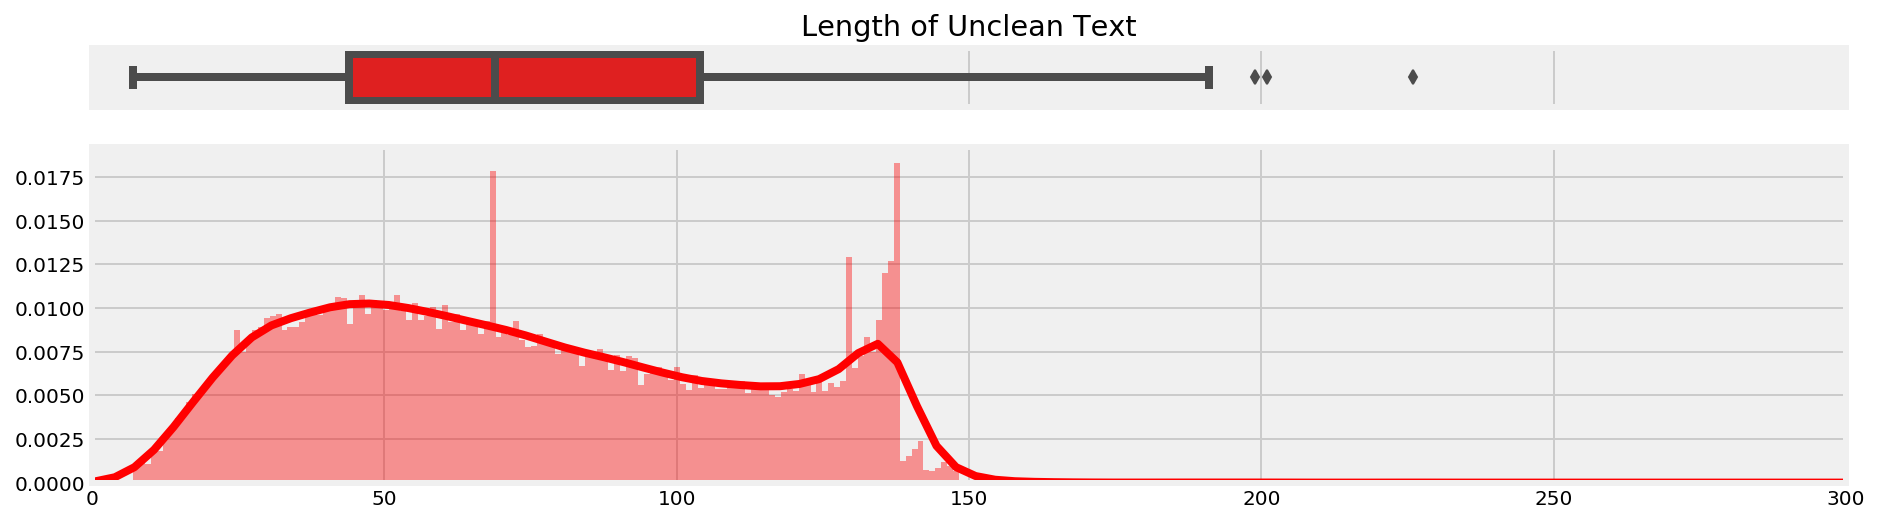

Tweets length distribution after cleaning


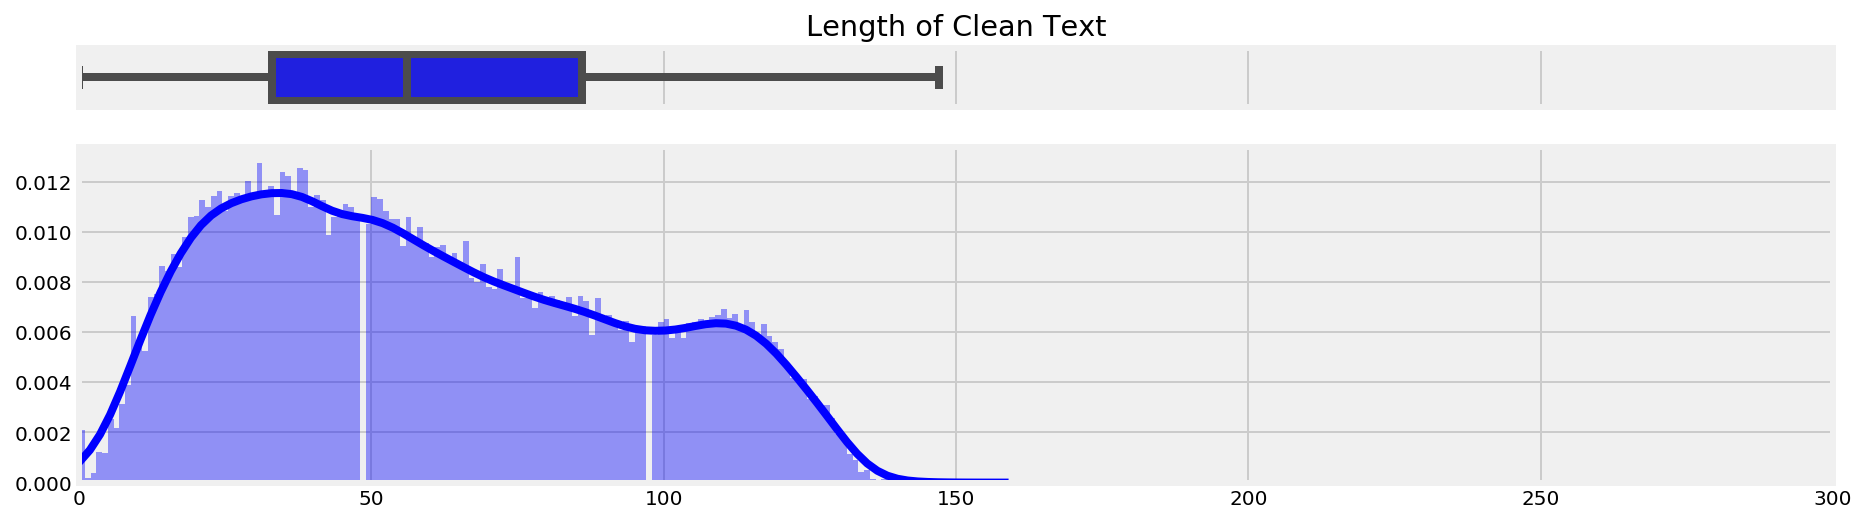

In [10]:
def generate_text_len_plot(series, label = 'pre_clean'):
    ''' '''
    title, clr, nbins = ('Length of Unclean Text', 'red', 300) if label is 'pre_clean' else ('Length of Clean Text', 'blue', 150)
        
    f, (ax_box, ax_hist) = plt.subplots(figsize=(14, 4), nrows=2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    bp = sns.boxplot(series, ax=ax_box, color=clr)
    dp = sns.distplot(series, ax=ax_hist, bins = nbins, color=clr)
    bp.set_title(title)
    plt.xlim(0,300)
    ax_box.set(xlabel='')
    plt.show()

print('Tweets length distribution before cleaning')
generate_text_len_plot(df_info['Train']['pre_clean_txt_len'])
print('Tweets length distribution after cleaning')
generate_text_len_plot(df_info['Train']['post_clean_txt_len'], 'post_cleaning')

In [11]:
## Checking anomalous cases
# print(list(train_DF.loc[200:300, 'text'].values))
# # display([TweetTextCleaner(text) for text in testing])
ano_cases = train_DF.loc[pd.Series(df_info['Train']['post_clean_txt_len']) > 140]
display(ano_cases.head())
print('This text length is', len(train_DF.iloc[ano_cases.index,1].values[0]))

,sentiment_class,text
5935,0,can not move out till i stop drinkin can not stop drinkin till i move out clearly this will not work do not like scrutiny do not like the judgement
8272,1,its just a book still piss cuz i be not get deja king queen bitch or last bitch standing but i be going to get it soon i hope lol a a ao nite
15858,0,cha kap tha maonh aa laoi nan tha lao va o cuac aua mai rai va lava tn ma ba baong kao toan cuai thang na y thi ma aaou rang ko naa cha ko ca
19126,1,i i i bandwidthe ei ii iiii eeee ieee iei ee i ie e ii ie ii i ii ie iiei e e e iiiee i iie ii e e ei e e ie ssde eee eei e ie ii ii i ei eeei
21614,0,i would really love to play this unkle album downstairs with the sub thumping but i do not need a visit from the police for a noise complaint


This text length is 147


Testing on some more cases.

In [12]:
## Custom checking
cleaning_steps = ast.literal_eval(str(config['DataPreparation']['text_cleaning_steps']))
txt = 'I my tummmmy hurt mrs whitney & blsf need to grade my @author report faster ___ . '
normalize_txt(txt, cleaning_steps) # & ---> And

'i my tummmmy hurt mrs whitney and blsf need to grade my report faster'

All of this is cause due to the expansion of the general words to their longer version 

In [16]:
## removing empty cases
empty_cases = train_DF.loc[pd.Series(df_info['Train']['post_clean_txt_len']) == 0]
display(empty_cases.head())
print('This text length is', len(train_DF.iloc[empty_cases.index,1].values[0]))
train_DF.drop(empty_cases.index, inplace=True)
train_DF.reset_index(drop=True, inplace=True)

,sentiment_class,text
132,0,
1312,1,
2107,0,
2699,1,
2737,0,


This text length is 0


##### Testset

### 4.5. Saving Cleaned Data as tsv <a class="anchor" id="H4e">

In [17]:
print("Dataset Shape:", train_DF.shape)
display(train_DF.head())

Dataset Shape: (39918, 2)


,sentiment_class,text
0,0,shady korean fellah do not call me once he get home
1,1,hah do you enjoy my random fact on sleep
2,0,i really be go to miss you
3,0,pasta be at work while rice be take a math test
4,0,wow atleast u only have three week i have two month to go be u go away


In [18]:
train_DF.to_csv(config['Paths']['cleaned_train_data_file'], sep='\t', index=False)
test_DF.to_csv(config['Paths']['cleaned_test_data_file'], sep='\t', index=False)

#### Checking if file saved properly

In [19]:
checkDF = pd.read_csv(config['Paths']['cleaned_train_data_file'], sep='\t')
print("Training Dataset Shape: ", checkDF.shape)
display(checkDF.head())

Dataset Shape:  (39918, 2)


,sentiment_class,text
0,0,shady korean fellah do not call me once he get home
1,1,hah do you enjoy my random fact on sleep
2,0,i really be go to miss you
3,0,pasta be at work while rice be take a math test
4,0,wow atleast u only have three week i have two month to go be u go away


In [20]:
from lib import datasetPrimAnalysis

print("Observing the structure of Train dataset")
# print("Train Dataset Shape :", train_DF.shape)
_ = datasetPrimAnalysis(checkDF)

# print("Observing the structure of Test dataset")
# _ = datasetPrimAnalysis(test_DF)

Observing the structure of Train dataset
Overall dataset shape : (39918, 2)
____________| Number of feature/s which are Qualitative : 1 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,CategoriesName,%Missing
text,0,object,0,39918,39261,thank you,50,"[shady korean fellah do not call me once he get home, hah do you enjoy my random fact on sleep, i really be go to miss you, pasta be at work while rice be take a math test, wow...",0.0


____________| Number of feature/s which are Quantitative : 1 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
sentiment_class,0,int64,0,39918.0,0.50248,0.5,0.0,0.0,1.0,1.0,1.0,0.0


In [21]:
## Checking for missing info
missing_info = checkDF.loc[checkDF['text'].isnull()]
missing_ind = missing_info.index
display(missing_info.head(15))

,sentiment_class,text


thing to note here is negative sentiment are associated when someperson has been tagged in general. Also we now have observed the reason for some clean text to be empty.

In [ ]:
### Ways to view defined variables
# globals()
# locals()
# dir()
# who

In [22]:
%whos

Variable                          Type             Data/Info
------------------------------------------------------------
add_recommendation                function         <function add_recommendation at 0x7f1c7472bd08>
additional_data_cleaning          function         <function additional_data<...>eaning at 0x7f1c1ba34510>
ano_cases                         DataFrame               sentiment_class   <...>nd do not say count sheep
ast                               module           <module 'ast' from '/usr/lib/python3.6/ast.py'>
checkDF                           DataFrame               sentiment_class   <...>n[39918 rows x 2 columns]
cleaning_steps                    list             n=13
color                             _ColorPalette    [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
config                            dict             n=2
create_key                        function         <function create_key at 0x7f1c7472bc80>
data_processing                   function        

In [ ]:
## Cleaning Workspace 
# del(www_pat)
# del(check_output, WordPunctTokenizer, BeautifulSoup, tok)

<h2><img src="http://sierraexpressmedia.com/wp-content/uploads/2016/01/checkpoint.png" alt="roundtoc" style="float:left;width:60px;height:60px;"><b>&emsp;Checkpoint 2 Reached</b><a class="anchor" id="check2"></a></h2>
&emsp;&emsp;&emsp;&emsp;&ensp;[Go to TOC](#TOC)  
&emsp;&emsp;&emsp;&emsp;&ensp;[Checkpoint_Head](#checkpoints)